In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [11]:
# Define and initiate the parameter
# F(tj, S(tj))
def f(t, s): return t**2 - (4 * s)  # ODE


h = 0.1  # Step size
t = np.arange(0, 1+h, h)  # Numerical Grid
s0 = 1  # Initial condition
s_real = ((31/32) * np.exp(-4*t)) + ((1/4)*(t**2)) - ((1/8)*t) + (1/32)

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i+1] = s[i] + h*f(t[i], s[i])
print(s)
print(s[len(t) - 1])

[1.         0.6        0.361      0.2206     0.14136    0.100816
 0.0854896  0.08729376 0.10137626 0.12482575 0.15589545]
0.15589545216000003


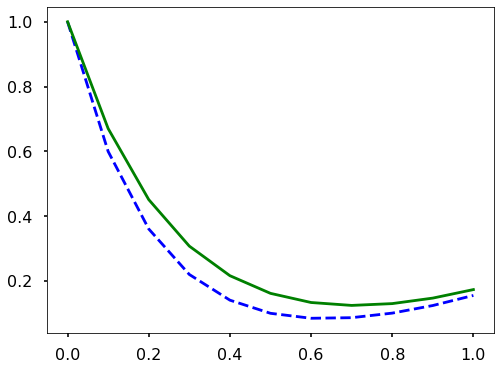

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(t, s, "b--")
plt.plot(t, s_real, "g")
plt.show()

In [13]:
# runge-kutta method
from scipy.integrate import solve_ivp as ivp

In [14]:
s_rk4 = ivp(f, [0, 1], [s0], t_eval=t)  # fourth degree runge-kutta
print(s_rk4.y[0])

s_rk2 = ivp(f, [0,1], [s0], method="RK23", t_eval=t) #second degree runge-kutta
print(s_rk2.y[0])

[1.         0.67044626 0.45128579 0.30823378 0.21686483 0.16251508
 0.13418599 0.12525323 0.13078119 0.14776827 0.17403925]
[1.         0.67014782 0.45066213 0.30702319 0.21585779 0.16147686
 0.13336954 0.12449244 0.13010664 0.14704268 0.17342367]


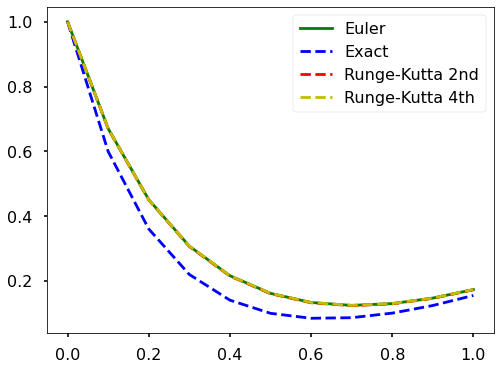

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(t, s_real, "g", label="Euler")
plt.plot(t, s, "b--", label="Exact")
plt.plot(t, s_rk2.y[0], "r--", label="Runge-Kutta 2nd")
plt.plot(t, s_rk4.y[0], "y--", label="Runge-Kutta 4th")
plt.legend()
plt.show()